In [1]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import poisson

%matplotlib inline

In [74]:
help(poisson)

Help on poisson_gen in module scipy.stats._discrete_distns object:

class poisson_gen(scipy.stats._distn_infrastructure.rv_discrete)
 |  poisson_gen(a=0, b=inf, name=None, badvalue=None, moment_tol=1e-08, values=None, inc=1, longname=None, shapes=None, extradoc=None, seed=None)
 |  
 |  A Poisson discrete random variable.
 |  
 |  %(before_notes)s
 |  
 |  Notes
 |  -----
 |  The probability mass function for `poisson` is:
 |  
 |  .. math::
 |  
 |      f(k) = \exp(-\mu) \frac{\mu^k}{k!}
 |  
 |  for :math:`k \ge 0`.
 |  
 |  `poisson` takes :math:`\mu \geq 0` as shape parameter.
 |  When :math:`\mu = 0`, the ``pmf`` method
 |  returns ``1.0`` at quantile :math:`k = 0`.
 |  
 |  %(after_notes)s
 |  
 |  %(example)s
 |  
 |  Method resolution order:
 |      poisson_gen
 |      scipy.stats._distn_infrastructure.rv_discrete
 |      scipy.stats._distn_infrastructure.rv_generic
 |      builtins.object
 |  
 |  Methods inherited from scipy.stats._distn_infrastructure.rv_discrete:
 |  
 |  _

In [9]:
poisson.pmf(mu = 30, k = np.arange(1, 10))

array([2.80728689e-12, 4.21093034e-11, 4.21093034e-10, 3.15819775e-09,
       1.89491865e-08, 9.47459326e-08, 4.06053997e-07, 1.52270249e-06,
       5.07567496e-06])

In [5]:
# Seaborn plot size
sns.set(rc={'figure.figsize':(16, 9)})

<AxesSubplot:xlabel='Q', ylabel='R'>

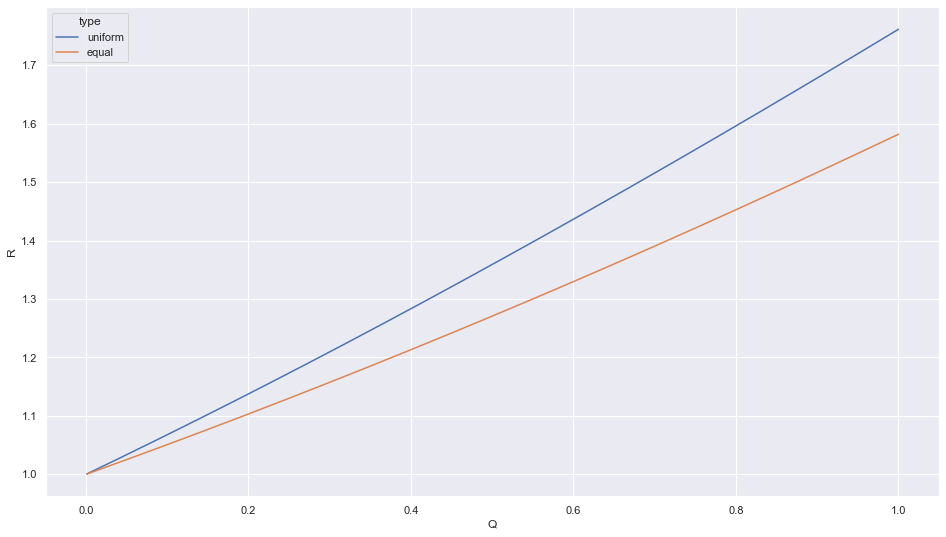

In [10]:
Q = np.arange(0.001, 1.001, 0.001)

r_equal = [i/(1-math.exp(-i)) for i in Q]
r_uniform = [(2*(i)**2)/((2*i)-(1-math.exp(-2*i))) for i in Q]

out_uniform = pd.DataFrame({
    "Q": Q, 
    "R": r_uniform,
    "type": 'uniform'
})

out_equal = pd.DataFrame({
    "Q": Q, 
    "R": r_equal, 
    "type": 'equal'
})
             
out = pd.concat([out_uniform, out_equal])

fig, ax = plt.subplots()

sns.lineplot(data = out, x = 'Q', y = 'R', hue = 'type')

# ax.legend(size = 2)

In [11]:
# Assuming that  tagged  and  untagged  fish  are  equally  vulnerable  to  angling, 
# the recycling rate is the total angling catch of  tagged fish, including recaptures, 
# divided by the number of  individual tagged fish caught not including recaptures. 

n = 500

n/400

1.25

Text(0, 0.5, 'Recycle rate (R)')

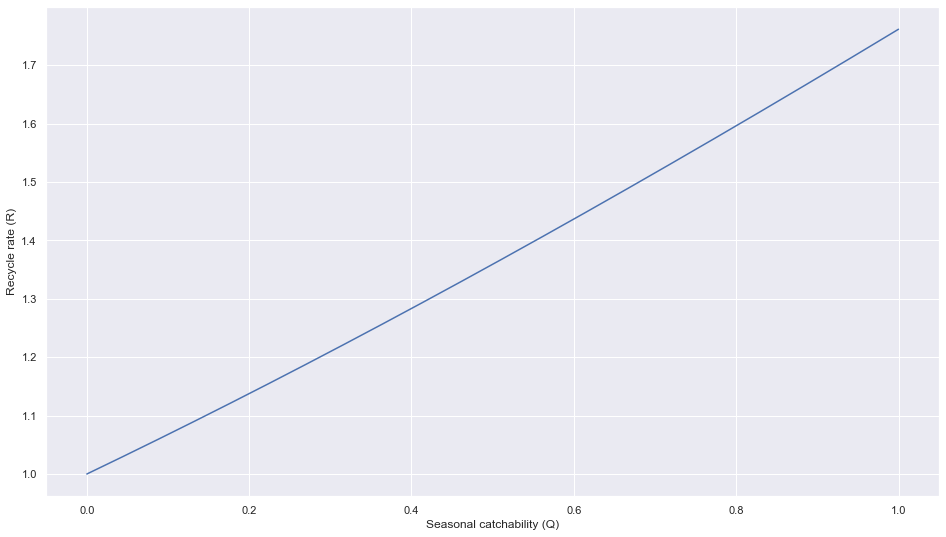

In [12]:
# Equal selectivity; unlikely

q = np.random.uniform(0, 1.0, 10000)

r_uniform = [(2*(i)**2)/((2*i)-(1-math.exp(-2*i))) for i in q]

out_uniform = pd.DataFrame({
    "q": q, 
    "r": r_uniform,
    "type": 'uniform'
})

fig, ax = plt.subplots()

sns.lineplot(data = out_uniform, x = 'q', y = 'r')

ax.set_xlabel('Seasonal catchability (Q)')
ax.set_ylabel("Recycle rate (R)")

Text(0, 0.5, 'Recycle rate (R)')

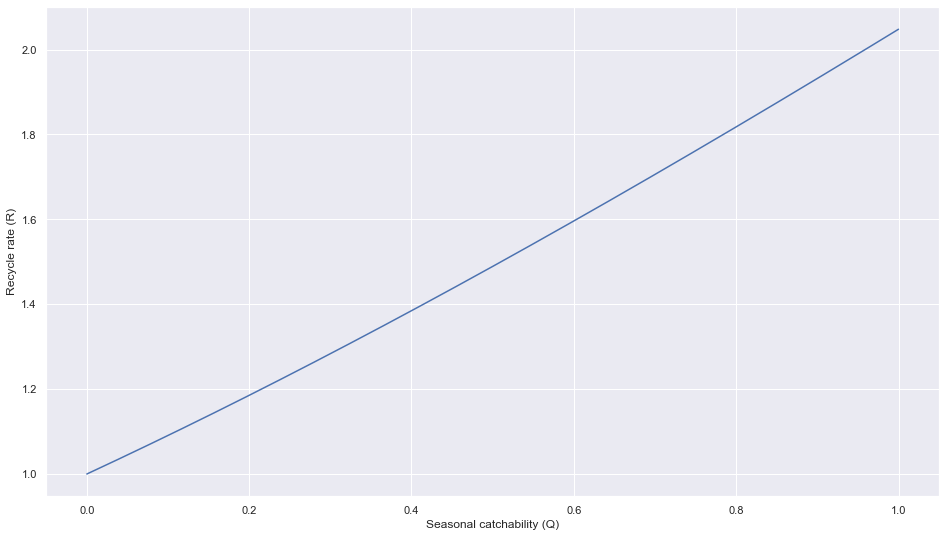

In [13]:
# selectivity varies in 75/25 proportions; only 75% of pop is available
# for uniformly distributed catchabilities among the vulnerabl population 
# 75% of total fish

q = np.random.uniform(0, 1.0, 10000)
p = 0.75

r_uniform = [(2*(i/p)**2)/(((2*i)/p)-(1-math.exp(-2*i/p))) for i in q]

out_uniform = pd.DataFrame({
    "q": q, 
    "r": r_uniform,
    "type": 'uniform'
})

fig, ax = plt.subplots()

sns.lineplot(data = out_uniform, x = 'q', y = 'r')

ax.set_xlabel('Seasonal catchability (Q)')
ax.set_ylabel("Recycle rate (R)")

q:  [0.10253244 0.25244002 0.50856444 0.75696478 0.89977942] 

 g0:  [0.66166926 0.70279071 0.78433888 0.88382942 0.95044668]


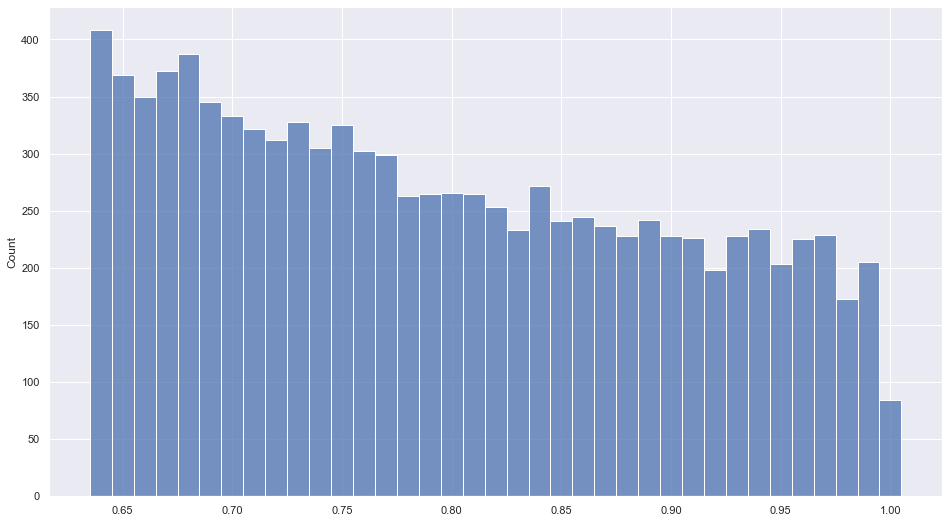

In [14]:
# eq 6 from jones et al 2022, g0
# g0 = p*math.exp(-lambdaQ/p)+(1-p)
# lambda is the tag reporting rate (assume .5)
# Fraction of tagged fish caught and reported i times, here i = 0
# this is indicative of tagged fish but who were not reported

quantiles = [0.1, 0.25, 0.5, 0.75, 0.9]
q = np.random.uniform(0, 1.0, 10000)
p = 0.75
lamb = 0.5

g_null = [p*math.exp(-lamb*i/p)+(1-p) for i in q]

fig, ax = plt.subplots()

sns.histplot(data = g_null, binwidth = 0.01)
print(
    'q: ', np.quantile(q, quantiles), 
    "\n\n",
    'g0: ', np.quantile(g_null, quantiles)
)

In [9]:
# Jones prefers the uniformly distributed model with all fish equally 
# susceptible to fishing pressure: simplicity, non-reliance on tag return
# data, good agreement with recycling rate generated by our plausible 
# selectivity distribution


<AxesSubplot:ylabel='Count'>

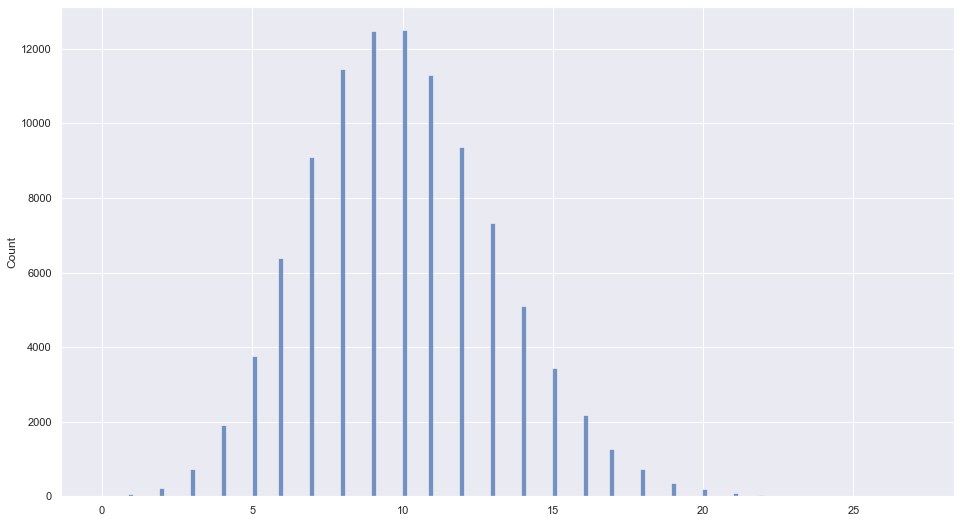

In [10]:
# Can estimate Tr (tags reported) from a poisson variable
sns.histplot(data = np.random.poisson(lam = 10, size = 100000))

In [11]:
q = 125000/67000 #C/N from Jones et al 2022

1.8656716417910448

In [34]:
# fraction of tagged fish reported 0 times - eq6 from Jones et al
# bottom of page 534, JOnes et al

bootstraps = 1000

q = 125000/67000 #C/N from Jones et al 2022
lam = np.arange(0.0, 1.01, 0.01) # tag reporting rate

p = 0.8 # proportion of fish vulnerable to angling

# p*math.exp(-np.random.choice(l, 1)*q/p)+(1-p)
i = 1
p_2 = []
while i <= bootstraps:
    p_2.append(p*math.exp(-np.random.choice(lam, 1)*q/p)+(1-p))
    i += 1

print(
    "mean: ", np.mean(p_2), 
    "\n\n",
    '95% CI: ', np.quantile(p_2, [0.025, 0.975])
)

mean:  0.517529509425461 

 95% CI:  [0.2813828  0.94594289]


In [54]:
bootstraps = 1000#len(lam)*1000
l = 0
i = 1
p = []
lams = []

while l <= len(lam):
    while i <= bootstraps:
        prob = 0.2
        lam_val = np.random.choice(lam, 1)[0]
        lams.append(lam_val)
        p.append(prob*math.exp(-(lam_val*q/prob))+(1-prob))
        i += 1
    l += 1
    
vals = pd.DataFrame({
    'lambda': lams, 
    'g_null': p
})

print(
    "mean: ", np.mean(p), 
    "\n\n",
    '95% CI: ', np.quantile(p, [0.025, 0.975]), 
    "\n\n",
    'len: ', len(p)
)

mean:  0.8219333172535748 

 95% CI:  [0.80002351 0.96636623] 

 len:  1000


In [56]:
foo = vals.assign(lq = lambda x: x['lambda']*q)
foo.sort_values('lq', ascending = True).head(20)
# vals
# sns.lineplot(data = foo, x = 'lq', y = 'g_null')

,lambda,g_null,lq
190,0.00,1.000000,0.000000
156,0.00,1.000000,0.000000
66,0.00,1.000000,0.000000
331,0.00,1.000000,0.000000
17,0.00,1.000000,0.000000
189,0.00,1.000000,0.000000
451,0.00,1.000000,0.000000
304,0.00,1.000000,0.000000
12,0.00,1.000000,0.000000
718,0.00,1.000000,0.000000


In [31]:
#For each lambda, we simulated 1000 seasns each for p values of
# 0.2, 0.5, and 0.8.
# Need to the repo this doesn't make sense. Eqs 6 and 7 are equations,
# not something that is allowed to change, unless they're referring to 
# allowing lambda to vary? Weird.

In [29]:
# .5/
1.86*.2688

0.49996799999999997

In [134]:
print(
    "mean: ", np.mean(p_2), 
    "\n\n",
    '95% CI: ', np.quantile(p_2, [0.025, 0.975]), 
    "\n\n",
    'len: ', len(p_2)
)

mean:  0.3785193502911371 

 95% CI:  [0.35732082 0.41475194] 

 len:  3
